In [1]:
%matplotlib inline

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_blobs

from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.manifold import Isomap, TSNE

# Dimensionality Reduction

In [10]:
iris_data, iris_labels = load_iris()["data"], load_iris()["target"]

In [11]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
iris_pca = PCA()

In [15]:
iris_data_transformed = iris_pca.fit_transform(iris_data)

In [16]:
iris_data_transformed.shape

(150, 4)

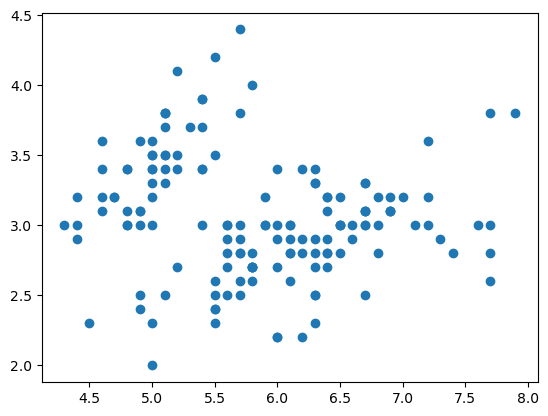

In [18]:
plt.scatter(iris_data[:, 0], iris_data[:, 1])
plt.show()

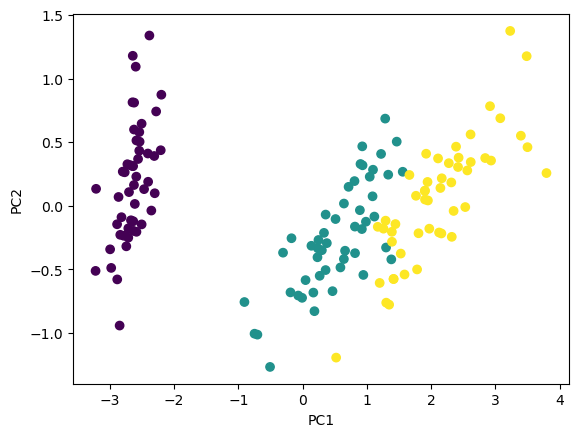

In [21]:
plt.scatter(iris_data_transformed[:, 0], iris_data_transformed[:, 1], c = iris_labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [23]:
iris_pca.components_ # transformation, vector coordinates

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [24]:
iris_pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [27]:
iris_pca.explained_variance_ratio_ # First component explains 92% of the dispersion of the original dataset, 2% error, 1/2 less data

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

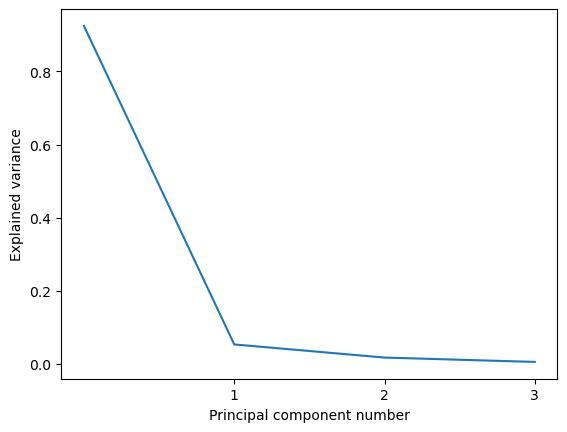

In [31]:
plt.plot(iris_pca.explained_variance_ratio_)
plt.xticks(range(1, len(iris_pca.explained_variance_ratio_)))
plt.xlabel("Principal component number")
plt.ylabel("Explained variance")
plt.show()

In [32]:
total_explained_variance = np.cumsum(iris_pca.explained_variance_ratio_)

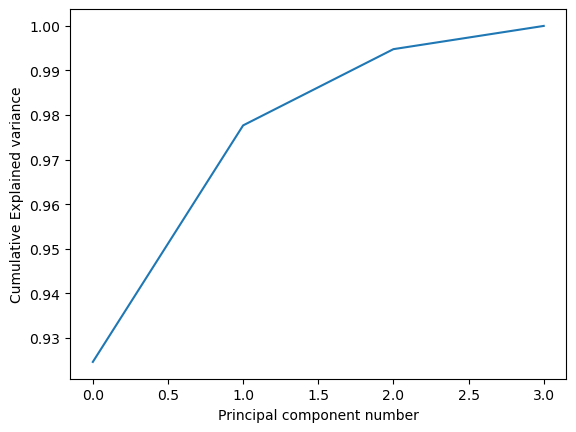

In [38]:
plt.plot(total_explained_variance)
plt.xlabel("Principal component number")
plt.ylabel("Cumulative Explained variance")
plt.show()

In [47]:
blob, _ = make_blobs(centers = [[3, 4.5]])
blob = blob @ np.array([[1.5, 3.5], [0.2, 2.5]])

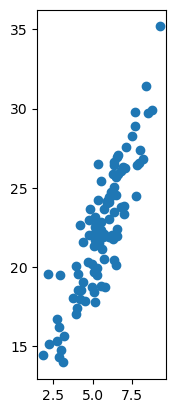

In [48]:
plt.scatter(blob[:, 0], blob[:, 1])
plt.gca().set_aspect("equal")

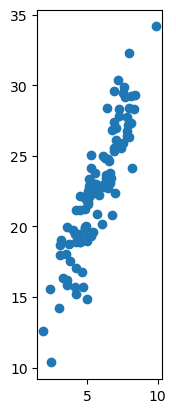

In [49]:
plt.scatter(blob_transformed[:, 0], blob_transformed[:, 1])
plt.gca().set_aspect("equal")

In [51]:
blob_pca = PCA()
blob_pcs = blob_pca.fit_transform(blob)

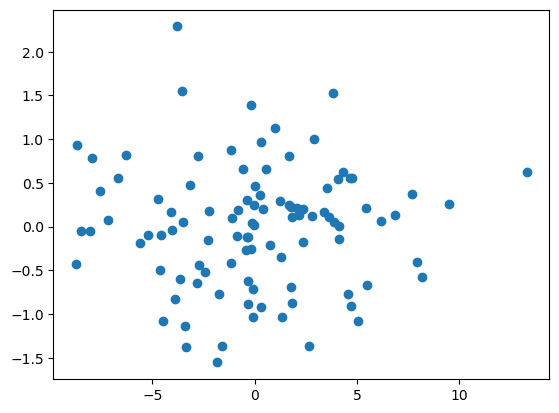

In [53]:
plt.scatter(blob_pcs[:, 0], blob_pcs[:, 1])
plt.show()

In [54]:
blob_pca.components_

array([[ 0.32216662,  0.94668298],
       [-0.94668298,  0.32216662]])

In [56]:
corr_matrix = np.corrcoef(blob[:, 0], blob[:, 1]) # Matrix of correlation, own values, own vectors

In [57]:
np.linalg.eig(corr_matrix)

(array([1.87631464, 0.12368536]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [58]:
blob_pca.get_covariance() # Matrix of co-variance

array([[ 2.31285656,  5.37841023],
       [ 5.37841023, 16.28692207]])

## Kernel PCA

In [60]:
iris_kernel_pca = KernelPCA(kernel = "rbf", gamma = 0.5)

In [61]:
iris_kernel_pca.fit(iris_data)

KernelPCA(gamma=0.5, kernel='rbf')

In [62]:
iris_kernel_pca.transform(iris_data)

array([[ 8.06112254e-01, -8.52788993e-03, -1.18737536e-01, ...,
        -9.22920468e-05, -7.28441598e-05,  1.28122107e-05],
       [ 7.53590419e-01, -1.21295370e-02, -8.42755705e-02, ...,
         1.69554036e-05, -9.05568585e-06,  1.12935266e-05],
       [ 7.62928489e-01, -4.98405269e-03, -9.95218340e-02, ...,
         1.26330893e-05, -3.12943706e-05, -4.65444257e-06],
       ...,
       [-4.96217010e-01,  4.29936574e-01, -2.29451664e-01, ...,
        -8.05309407e-07,  7.25414777e-07,  3.12312568e-07],
       [-3.73553921e-01,  4.66090038e-01, -8.82043620e-02, ...,
         7.33265768e-08,  9.18492648e-08,  1.04470548e-08],
       [-5.09427113e-01,  8.06174516e-02, -3.28747665e-01, ...,
         3.19949601e-07, -8.28222225e-08,  4.94232301e-08]])

## Linear discriminant analysis - LinDA

In [64]:
linda = LinearDiscriminantAnalysis()

In [65]:
linda.fit(iris_data, iris_labels)

LinearDiscriminantAnalysis()

In [67]:
iris_data_linda = linda.transform(iris_data)

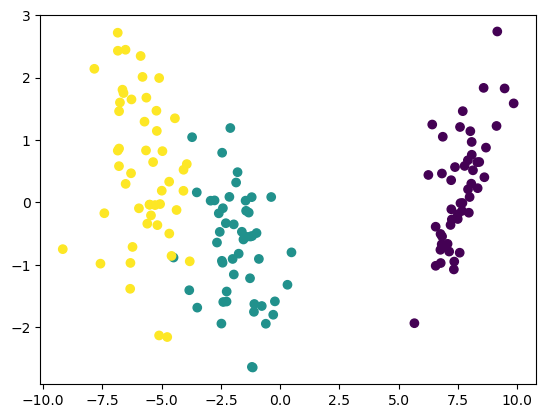

In [69]:
plt.scatter(iris_data_linda[:, 0], iris_data_linda[:, 1], c = iris_labels)
plt.show()

# Manifold Learning

In [71]:
isomap = Isomap(n_neighbors = 5, n_components = 2)

In [74]:
iris_data_isomap = isomap.fit_transform(iris_data)

C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\sklearn\manifold\_isomap.py:348: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


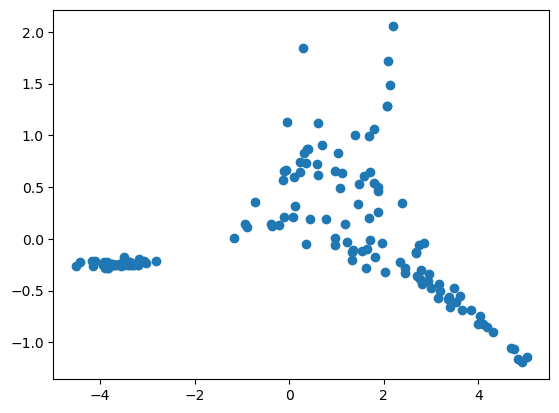

In [75]:
plt.scatter(iris_data_isomap[:, 0], iris_data_isomap[:, 1])

## t-SNE

In [83]:
tsne = TSNE(n_components = 2, init = "pca")

In [84]:
iris_data_tsne = tsne.fit_transform(iris_data)

C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\warma\anaconda3\envs\data_science\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


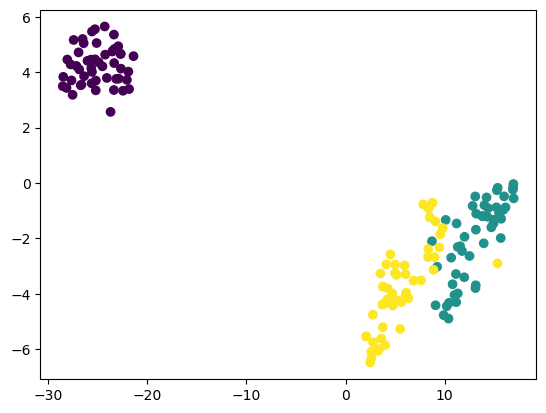

In [87]:
plt.scatter(iris_data_tsne[:, 0], iris_data_tsne[:, 1], c = iris_labels)